## Travel Insurance Prediction

## Data Loading

In [ ]:
# Importing dataset via kaggle

!kaggle datasets download -d tejashvi14/travel-insurance-prediction-data

In [3]:
# Exporting dataset from zipfile

import zipfile
zip_ref = zipfile.ZipFile('/home/bhxveshhh/ML/Travel Insurance Prediction/travel-insurance-prediction-data.zip', 'r')
zip_ref.extractall('/home/bhxveshhh/ML/Travel Insurance Prediction')
zip_ref.close()

## Exploratory Data Analysis

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [62]:
df = pd.read_csv('TravelInsurancePrediction.csv')

In [63]:
df.head(5)

,Unnamed: 0,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance
0,0,31,Government Sector,Yes,400000,6,1,No,No,0
1,1,31,Private Sector/Self Employed,Yes,1250000,7,0,No,No,0
2,2,34,Private Sector/Self Employed,Yes,500000,4,1,No,No,1
3,3,28,Private Sector/Self Employed,Yes,700000,3,1,No,No,0
4,4,28,Private Sector/Self Employed,Yes,700000,8,1,Yes,No,0


In [33]:
df.shape

(1987, 10)

In [34]:
df.size

19870

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1987 entries, 0 to 1986
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Unnamed: 0           1987 non-null   int64 
 1   Age                  1987 non-null   int64 
 2   Employment Type      1987 non-null   object
 3   GraduateOrNot        1987 non-null   object
 4   AnnualIncome         1987 non-null   int64 
 5   FamilyMembers        1987 non-null   int64 
 6   ChronicDiseases      1987 non-null   int64 
 7   FrequentFlyer        1987 non-null   object
 8   EverTravelledAbroad  1987 non-null   object
 9   TravelInsurance      1987 non-null   int64 
dtypes: int64(6), object(4)
memory usage: 155.4+ KB


In [36]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,1987.0,993.000000,573.741812,0.0,496.5,993.0,1489.5,1986.0
Age,1987.0,29.650226,2.913308,25.0,28.0,29.0,32.0,35.0
AnnualIncome,1987.0,932762.959235,376855.684748,300000.0,600000.0,900000.0,1250000.0,1800000.0
FamilyMembers,1987.0,4.752894,1.609650,2.0,4.0,5.0,6.0,9.0
ChronicDiseases,1987.0,0.277806,0.448030,0.0,0.0,0.0,1.0,1.0
TravelInsurance,1987.0,0.357323,0.479332,0.0,0.0,0.0,1.0,1.0


In [37]:
df.isnull().sum()

Unnamed: 0             0
Age                    0
Employment Type        0
GraduateOrNot          0
AnnualIncome           0
FamilyMembers          0
ChronicDiseases        0
FrequentFlyer          0
EverTravelledAbroad    0
TravelInsurance        0
dtype: int64

In [38]:
df.duplicated().sum()

np.int64(0)

In [39]:
df.nunique()

Unnamed: 0             1987
Age                      11
Employment Type           2
GraduateOrNot             2
AnnualIncome             30
FamilyMembers             8
ChronicDiseases           2
FrequentFlyer             2
EverTravelledAbroad       2
TravelInsurance           2
dtype: int64

In [40]:
unique_employment = df['Employment Type'].unique()
print(unique_employment)

['Government Sector' 'Private Sector/Self Employed']


## Data Visualization

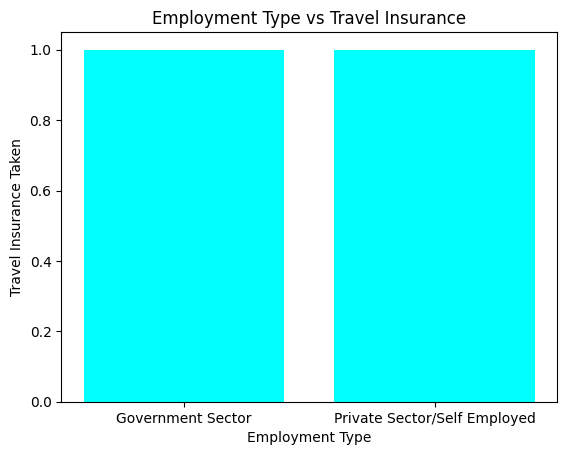

In [57]:
# Bar Chart – Employment Type vs Travel Insurance

plt.bar(df['Employment Type'], df['TravelInsurance'], color='cyan')
plt.xlabel('Employment Type')
plt.ylabel('Travel Insurance Taken')
plt.title('Employment Type vs Travel Insurance')
plt.xticks([0, 1], ['Government Sector', 'Private Sector/Self Employed'])
plt.show()

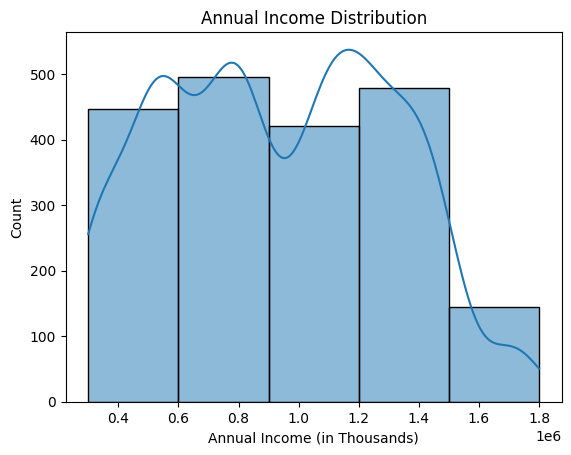

In [64]:
# Histogram – Annual Income Distribution

income_data = df['AnnualIncome']
sns.histplot(income_data, bins=5, kde=True)
plt.xlabel('Annual Income (in Thousands)')
plt.title('Annual Income Distribution')
plt.show()

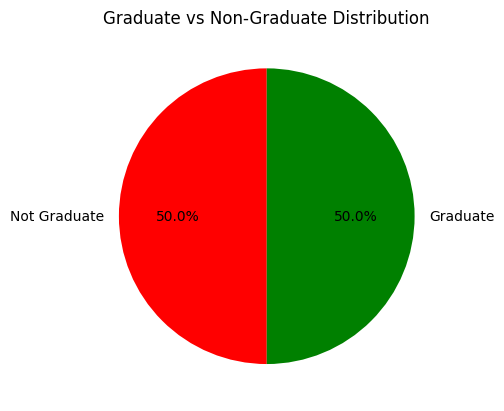

In [58]:
# Pie Chart – Graduate Status Distribution

labels = ['Not Graduate', 'Graduate']
sizes = [1, 1]  
colors = ['red', 'green']

plt.pie(sizes, labels=labels, autopct='%1.1f%%', colors=colors, startangle=90)
plt.title('Graduate vs Non-Graduate Distribution')
plt.show()

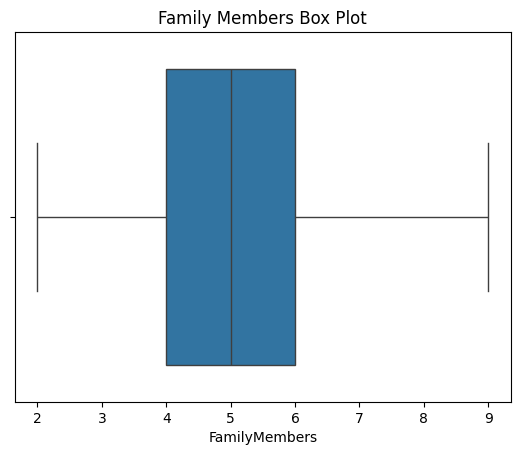

In [65]:
# Box Plot – Family Members Distribution

family_members = df['FamilyMembers']
sns.boxplot(x=family_members)
plt.title('Family Members Box Plot')
plt.show()

<Axes: xlabel='AnnualIncome', ylabel='FamilyMembers'>

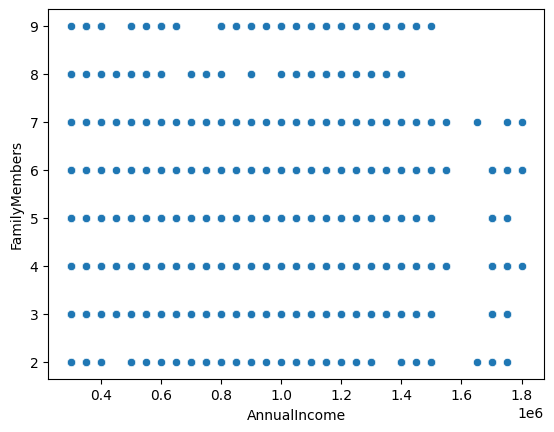

In [67]:
# Scatter Plot – Annual Income vs Family Members

sns.scatterplot(x='AnnualIncome', y='FamilyMembers', data=df)


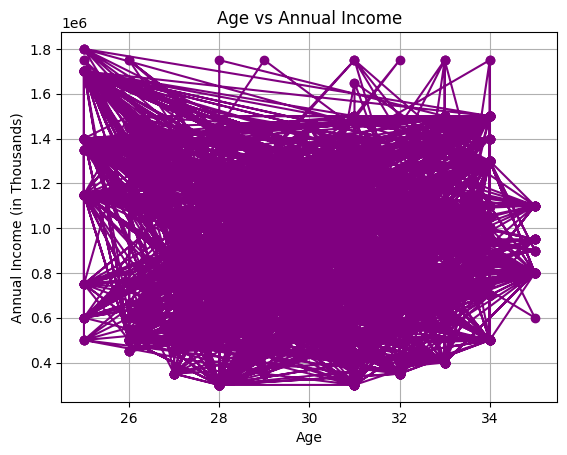

In [68]:
# Line Chart – Age vs Annual Income

ages = df['Age']
annual_income = df['AnnualIncome']
plt.plot(ages, annual_income, marker='o', linestyle='-', color='purple')
plt.xlabel('Age')
plt.ylabel('Annual Income (in Thousands)')
plt.title('Age vs Annual Income')
plt.grid(True)
plt.show()


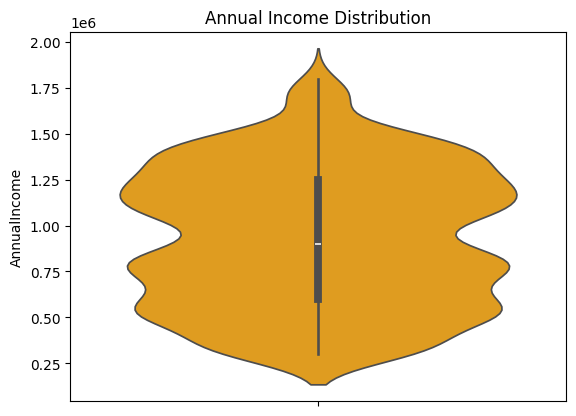

In [69]:
# Violin Plot – Annual Income Distribution

income_data = df['AnnualIncome']
sns.violinplot(y=income_data, color="orange")
plt.title("Annual Income Distribution")
plt.show()

## Data Preprocessing

In [41]:
# Dropping unnamed column

df = df.drop(columns=['Unnamed: 0'])

In [42]:
# Labelling Categorical Variables

df["Employment Type"]= df["Employment Type"].map({"Government Sector": 0, "Private Sector/Self Employed":1})
df["GraduateOrNot"]=df["GraduateOrNot"].map({"No":0, "Yes":1})
df["FrequentFlyer"]=df["FrequentFlyer"].map({"No":0, "Yes":1})
df["EverTravelledAbroad"]=df["EverTravelledAbroad"].map({"No":0, "Yes":1})

In [43]:
X = df.drop(columns=['TravelInsurance'])
y = df['TravelInsurance']

In [44]:
# Train Test Split

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Model Building

In [49]:
from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score

In [46]:
logistic_clf = LogisticRegression()
ridge_clf = RidgeClassifier()
xgboost_clf = XGBClassifier()
random_forest_clf = RandomForestClassifier()
ada_boost_clf = AdaBoostClassifier()
grad_boost_clf = GradientBoostingClassifier()
bagging_clf = BaggingClassifier()
decision_tree_clf = DecisionTreeClassifier()
svm_clf = SVC()

In [47]:
model_li = [logistic_clf, ridge_clf, xgboost_clf, random_forest_clf, 
            ada_boost_clf, grad_boost_clf, bagging_clf, decision_tree_clf, svm_clf]

scores = []
for model in model_li:
    model.fit(X_train, y_train)
    scores.append(accuracy_score(y_test, model.predict(X_test)))

print(scores)

[0.7613065326633166, 0.7537688442211056, 0.8165829145728644, 0.821608040201005, 0.8040201005025126, 0.8442211055276382, 0.8015075376884422, 0.8065326633165829, 0.7964824120603015]
